In [15]:
using Plots, DelimitedFiles
using Images 
using LinearAlgebra
using Statistics

In [3]:
H = readdlm("/home/jose/julia_projects/estudos_Julia/04_linear_regression/housing.data");
b = H[:,size(H)[2]]; # housing values in $1000s
A = H[:,1:size(H)[2]-1]; # other factors

In [4]:
aa = PaddedView(1, A, (size(A)[1],size(A)[2]+1));

In [5]:
# Solve Ax=b using SVD
# Note that the book uses the Matlab-specific "regress" command
u, s, v = svd(Array(aa));
x = v * inv(Diagonal(s)) * transpose(u) * b;


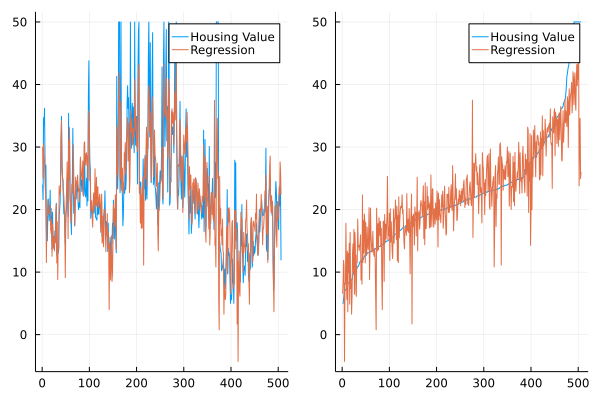

In [13]:
plot1 = plot([b aa * x], label=["Housing Value" "Regression"])#, subplot=1) # True relationship
# plot!(aa * x, line=:dash,label="Regression")#, subplot=1)
sort_ind = sortperm(H[:,size(H)[2]]);
bb = b[sort_ind];
aSort = aa[sort_ind,:];
plot2 = plot([bb aSort * x], label=["Housing Value" "Regression"])
# plot(bb, label="Housing Value")#, subplot=2) # True relationship
# plot!(aSort * x, line=:dash,label="Regression")#, subplot=2)
plot(plot1, plot2, layout=(1,2))

In [44]:
A_mean = mean(aa,dims=1);

aa2 = aa .- ones((size(aa)[1], 1)) * A_mean;

In [46]:
for j in 1:(size(aa)[2]-1)
    A2std = std(aa2[:,j])
    aa2[:,j] = aa2[:,j]/A2std
end

In [48]:
size(aa2)

(506, 14)

In [50]:
aa2[:,size(aa2)[2]] = ones(size(aa)[1]);

In [52]:
u, s, v = svd(Array(aa2));
x = v * inv(Diagonal(s)) * transpose(u) * b;



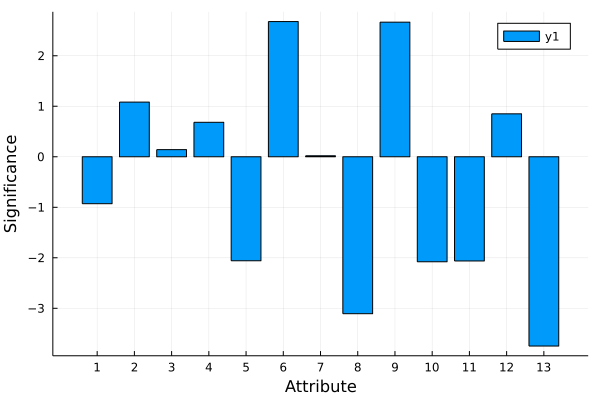

In [71]:
x_tick = 1 : (length(x)-1)
bar(x_tick,x[1:length(x)-1],xticks = x_tick)
xaxis!("Attribute")
yaxis!("Significance")

In [72]:
H = readdlm("/home/jose/julia_projects/estudos_Julia/04_linear_regression/housing.data");
b = H[:,size(H)[2]]; # housing values in $1000s
A = H[:,1:size(H)[2]-1]; # other factors
aa = PaddedView(1, A, (size(A)[1],size(A)[2]+1));

In [90]:
n = 253;
btrain = b[1:n];
Atrain = aa[1:n];
btest = b[n:length(b)];
Atest = aa[n:length(aa)];

In [96]:
# Solve Ax=b using SVD
# Note that the book uses the Matlab-specific "regress" command
u, s, v = svd(Array(Atrain));
x = v * inv(Diagonal(s)) * transpose(u) * btrain;

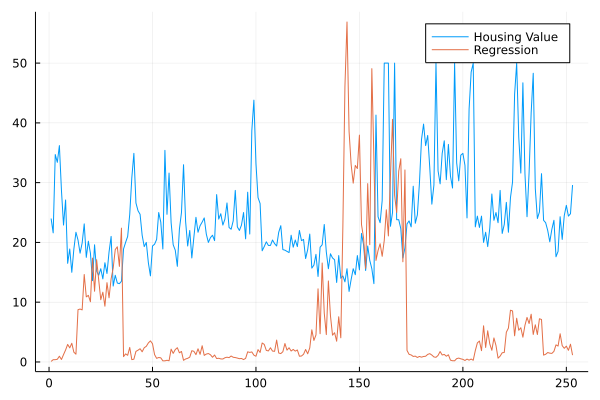

In [97]:
plot1 = plot([btrain Atrain .* x], label=["Housing Value" "Regression"])#, subplot=1) # True relationship
